In [1]:
print("Hello, world!")

Hello, world!


In [14]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [15]:
fetch_housing_data()

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [54]:
housing["total_rooms"].value_counts()

total_rooms
1527.0    16
1582.0    15
1471.0    14
1462.0    13
2127.0    13
          ..
6157.0     1
6862.0     1
4850.0     1
6956.0     1
7437.0     1
Name: count, Length: 5488, dtype: int64

In [18]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


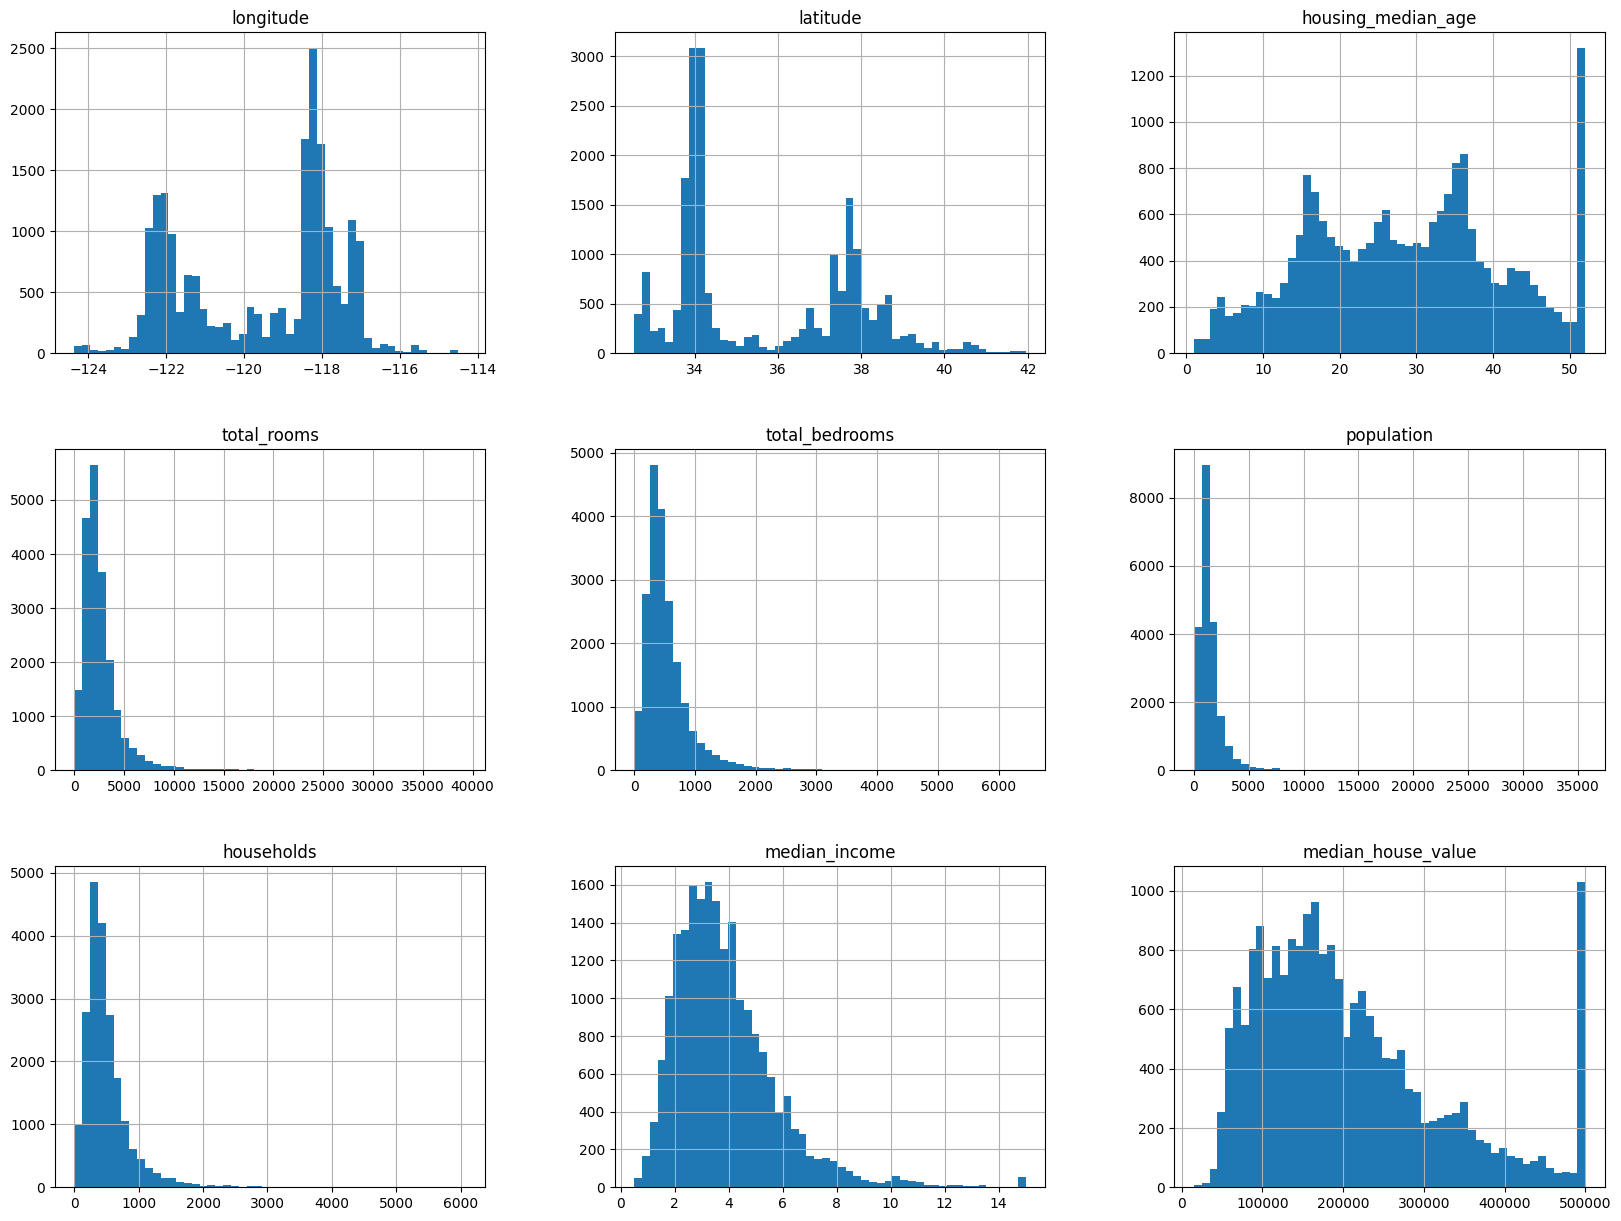

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
import numpy as np

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [25]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0)

0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

In [26]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [32]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3.0     0.350581
2.0     0.318847
4.0     0.176308
5.0     0.068944
1.0     0.039826
6.0     0.025775
7.0     0.009157
8.0     0.005087
9.0     0.002422
11.0    0.002374
10.0    0.000678
Name: count, dtype: float64

In [33]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [34]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

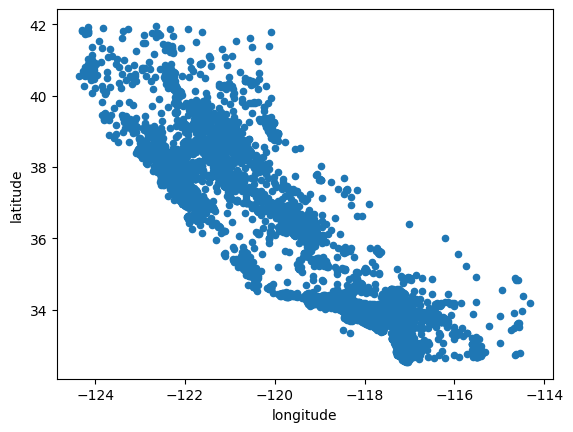

In [35]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

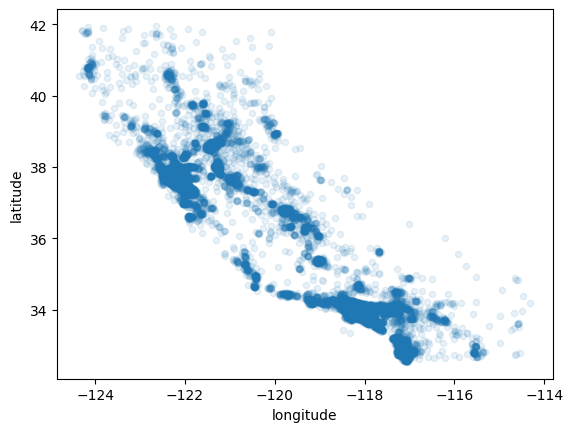

In [36]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

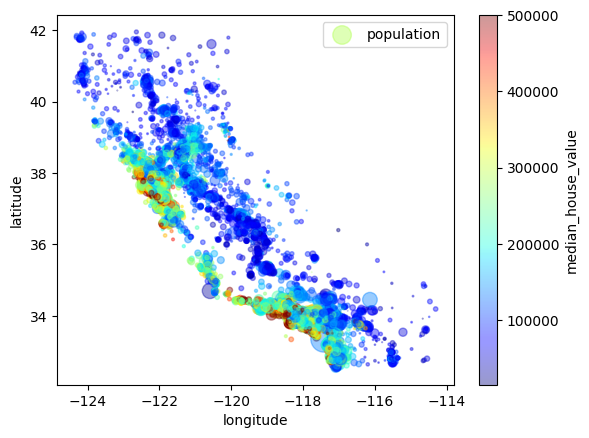

In [40]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population",
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [44]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16356 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [45]:
housing_numeric = housing.select_dtypes(include=[float, int])

In [46]:
corr_matrix = housing_numeric.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687474
total_rooms           0.135989
housing_median_age    0.111770
households            0.065841
total_bedrooms        0.049177
population           -0.024765
longitude            -0.045056
latitude             -0.144684
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

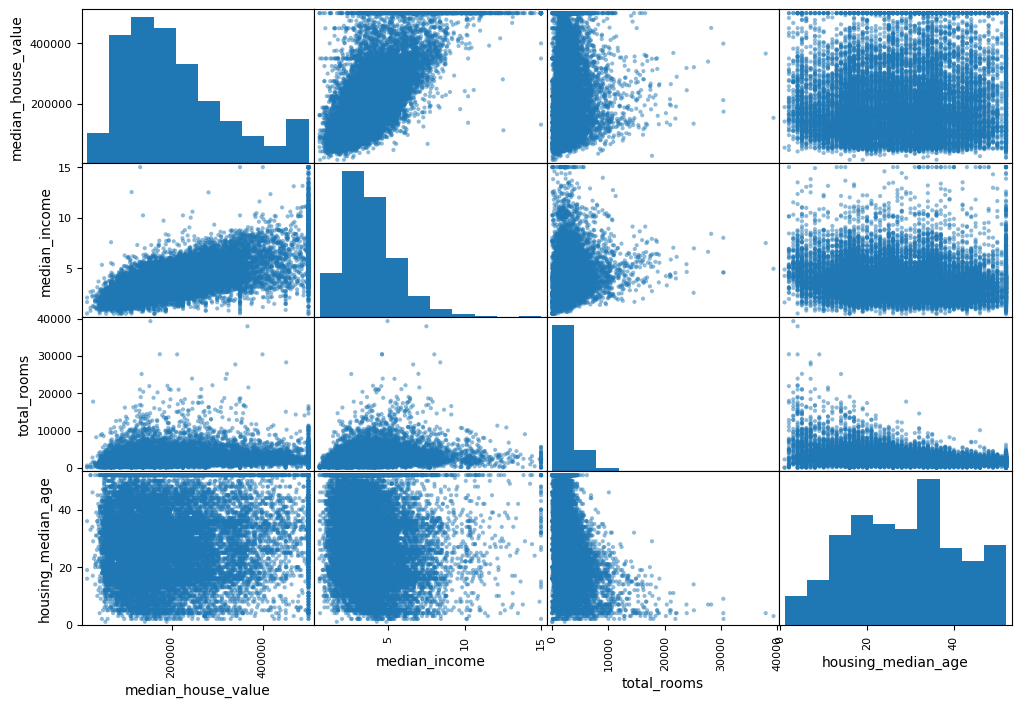

In [49]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

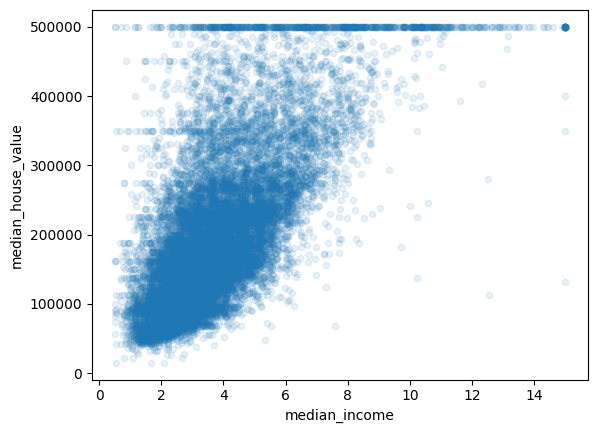

In [50]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [51]:
housing["rooms_per_househoold"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [53]:
housing_numeric = housing.select_dtypes(include=[float, int])

corr_matrix = housing_numeric.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687474
rooms_per_househoold        0.145750
total_rooms                 0.135989
housing_median_age          0.111770
households                  0.065841
total_bedrooms              0.049177
population_per_household   -0.021844
population                 -0.024765
longitude                  -0.045056
latitude                   -0.144684
bedrooms_per_room          -0.259679
Name: median_house_value, dtype: float64

In [127]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [128]:
print(housing.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')


In [129]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)

In [130]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [131]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2122.    ,  434.    , 1166.    ,
        408.    ,    3.5409])

In [132]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2122.    ,  434.    , 1166.    ,
        408.    ,    3.5409])

In [133]:
X = imputer.transform(housing_num)

In [134]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [135]:
from sklearn.preprocessing import LabelEncoder

In [136]:
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]

In [137]:
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [138]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [139]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [140]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [141]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [142]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [143]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [144]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [145]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


In [146]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_Scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('one_hot', OneHotEncoder()),
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [147]:
housing_prepared = full_pipeline.fit_transform(housing)

In [148]:
housing_prepared

<16512x16 sparse matrix of type '<class 'numpy.float64'>'
	with 198144 stored elements in Compressed Sparse Row format>

In [149]:
housing_prepared.shape

(16512, 16)

In [150]:
housing_prepared.toarray()

array([[-1.15788621,  0.77388697,  0.74440696, ...,  0.        ,
         0.        ,  0.        ],
       [-1.44259512,  1.0077626 ,  1.85708974, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.18471864, -1.3403487 ,  0.18806557, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58431009, -0.72291704, -1.56043594, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7801323 , -0.84920988,  0.18806557, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43760023,  0.99840757,  1.85708974, ...,  0.        ,
         1.        ,  0.        ]])

In [151]:
housing_prepared.shape

(16512, 16)

In [174]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
15698,-122.46,37.79,52.0,899.0,96.0,304.0,110.0,14.2959,NEAR BAY
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [175]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [176]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data_prepared))

Predictions:	 [209300.19192134 661078.18273371 210913.91509595  57466.82615634
 186707.42056011]


In [177]:
print("Labels:\t\t", list(some_labels))

Labels:		 [286600.0, 500001.0, 196900.0, 46300.0, 254500.0]


In [178]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68321.70513040756

In [179]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [180]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [181]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [183]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [194]:
display_scores(rmse_scores)

Scores: [69972.02751232 68662.63292076 68402.75080656 70757.00090127
 70788.48951727 75632.94832359 68879.04062009 73976.29815828
 74052.19502115 72060.53911761]
Mean: 71318.39228988923
Standard deviation: 2400.3631323084796


In [195]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [196]:
display_scores(lin_rmse_scores)

Scores: [66614.97637441 66150.38615092 67344.59963671 74470.89115691
 71434.35705372 69791.47985328 65376.52912457 67643.17800436
 69655.22819542 67378.82163237]
Mean: 68586.04471826648
Standard deviation: 2633.374877759027


In [203]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [204]:
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [205]:
housing_predictions = forest_reg.predict(housing_prepared)


In [206]:
forest_mse = mean_squared_error(housing_labels, housing_predictions)

In [207]:
forest_rmse = np.sqrt(forest_mse)

In [208]:
forest_rmse

18761.080033107053

In [212]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [213]:
display_scores(forest_rmse_scores)

Scores: [69972.02751232 68662.63292076 68402.75080656 70757.00090127
 70788.48951727 75632.94832359 68879.04062009 73976.29815828
 74052.19502115 72060.53911761]
Mean: 71318.39228988923
Standard deviation: 2400.3631323084796


In [214]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                         scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [215]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [216]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [217]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64244.91190479209 {'max_features': 2, 'n_estimators': 3}
56352.10887548001 {'max_features': 2, 'n_estimators': 10}
52695.80928409205 {'max_features': 2, 'n_estimators': 30}
60516.976310675345 {'max_features': 4, 'n_estimators': 3}
52363.53802896539 {'max_features': 4, 'n_estimators': 10}
50865.34976678467 {'max_features': 4, 'n_estimators': 30}
60185.87186328104 {'max_features': 6, 'n_estimators': 3}
52483.78668051147 {'max_features': 6, 'n_estimators': 10}
50302.08422672936 {'max_features': 6, 'n_estimators': 30}
58287.70483657478 {'max_features': 8, 'n_estimators': 3}
52644.59425402842 {'max_features': 8, 'n_estimators': 10}
50239.966121325866 {'max_features': 8, 'n_estimators': 30}
62361.57065883122 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54327.082900237736 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59717.97975497593 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52417.82190229319 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [218]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.60325400e-02, 6.45096820e-02, 4.27729102e-02, 1.50668878e-02,
       1.44274120e-02, 1.52397047e-02, 1.44507589e-02, 4.07490916e-01,
       3.87407006e-02, 1.14234902e-01, 4.75341004e-02, 6.91136174e-03,
       1.46962388e-01, 9.04588510e-05, 2.56442553e-03, 2.97085094e-03])

In [219]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

In [220]:
cat_one_hot_attribs = list(encoder.classes_)

In [221]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [223]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.4074909161564816, 'median_income'),
 (0.14696238759156177, 'INLAND'),
 (0.1142349024604544, 'pop_per_hhold'),
 (0.06603254000501843, 'longitude'),
 (0.06450968200951922, 'latitude'),
 (0.04753410043583305, 'bedrooms_per_room'),
 (0.04277291019532654, 'housing_median_age'),
 (0.03874070055487887, 'rooms_per_hhold'),
 (0.015239704748637234, 'population'),
 (0.015066887839520541, 'total_rooms'),
 (0.014450758926487152, 'households'),
 (0.01442741201962968, 'total_bedrooms'),
 (0.006911361743844166, '<1H OCEAN'),
 (0.002970850935449159, 'NEAR OCEAN'),
 (0.0025644255263746066, 'NEAR BAY'),
 (9.045885098368053e-05, 'ISLAND')]

In [226]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [227]:
final_rmse

47486.64800010293

In [230]:
import joblib

joblib.dump(final_model, "final_housing_model.pkl")

final_model_loaded = joblib.load("final_housing_model.pkl")